In [63]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [430]:
#Read files
CR_df = pd.read_csv("extract - cash request - data analyst.csv")
fees_df = pd.read_csv("extract - fees - data analyst - .csv")

In [431]:
#Explore cash_request
display(CR_df.head())
CR_df.info()


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [432]:
#Explore fees
display(fees_df.head())
fees_df.info()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [433]:
def freq_of_use(CR_data):
    """
    Frequency of Service Usage: Understand how often users from each cohort utilize IronHack Payments' cash advance services over time.
    """
    # # ALTERNATIVE 1
    # date_count = {}
    # #Initialize the year and month counts to 0
    # for date in CR_data["created_at"]:
    #     year_month = date[:7]
    #     date_count[year_month] = 0
    
    # #Count each year
    # for date in CR_data["created_at"]:
    #     year_month = date[:7]
    #     date_count[year_month] += 1
    
    # date_count = dict(sorted(date_count.items()))
    
    # # ALTERNATIVE 2
    #Add a new column to CR_data to group by year_month (=cohort)
    CR_data["cohort"] = CR_data["created_at"].str[:7]
    date_count = CR_data[["cohort","created_at"]].groupby("cohort").count()
    date_count.columns = ["CR_count"]

    return date_count

,CR_count
cohort,
2019-11,1
2019-12,289
2020-01,223
2020-02,184
2020-03,244
2020-04,473
2020-05,837
2020-06,2615
2020-07,3601


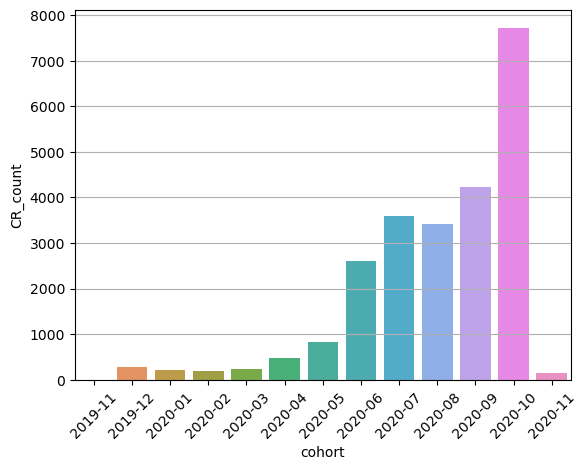

In [434]:
a = freq_of_use(CR_df)
display(a)

# #Plot the results (ALTERNATIVE 1)
# date_count_df = pd.DataFrame(a.items(), columns=['Date', 'Count'])
# display(date_count_df)
# barplot = sns.barplot(x="Date", y="Count", data=pd.DataFrame(a.items(), columns=['Date', 'Count']))
# barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45); #The semicolon (;) hides the output of this last line

#Plot the results (ALTERNATIVE 2)
barplot = sns.barplot(x=a.index, y="CR_count", data=a)
barplot.grid(axis="y")
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45); #The semicolon (;) hides the output of this last line

In [435]:
def incident_rate(CR_data):
    """
    Incident Rate: Determine the incident rate, specifically focusing on payment incidents, for each cohort.
    Identify if there are variations in incident rates among different cohorts.
    """
    #Print the overall incident rate
    # incident_over_total = 1 - CR_data["recovery_status"].isna().sum() / len(CR_data["recovery_status"])
    # print(f"Overall incident rate: {incident_over_total*100:.2f}%")

    #Add a new column to CR_data to group by year_month (=cohort)
    CR_data["cohort"] = CR_data["created_at"].str[:7]
    
    #Calculate incident_by_cohort_ratio
    incident_per_cohort = CR_data[["cohort","recovery_status"]].groupby("cohort").count()
    cr_per_cohort_count = freq_of_use(CR_data)
    #display(incident_per_cohort,cr_per_cohort_count)
    incident_by_cohort_ratio = incident_per_cohort["recovery_status"] / cr_per_cohort_count["CR_count"] * 100

    return incident_by_cohort_ratio.round(2)

In [436]:
b = incident_rate(CR_df)
b

cohort
2019-11     0.00
2019-12    13.49
2020-01    14.80
2020-02     8.70
2020-03     7.38
2020-04    12.47
2020-05    15.41
2020-06    12.58
2020-07    11.16
2020-08    12.82
2020-09    13.72
2020-10    16.31
2020-11    20.00
dtype: float64

In [480]:
def revenue_by_cohort(CR_data, fee_data):
    """
    Revenue Generated by the Cohort: Calculate the total revenue generated by each cohort over months to assess the financial impact of user behavior.
    """
    #Add a new column to CR_data to group by year_month (=cohort)
    CR_data["cohort"] = CR_data["created_at"].str[:7]
    
    #Add a new column to fee_data to group by cohort by comparing CR_data["id"] to fee_data["cash_request_id"]
    fee_data = pd.merge(fee_data,CR_data[["id","cohort"]],left_on='cash_request_id', right_on='id', how='left')
    #fee_data.drop(columns=["id"]) #pd.merge also added the "id" column to fees_data, but we don't need it, so we delete it

    #Filter data
    filtered_CR_data = CR_data[CR_data["status"].isin(["approved","money_sent","direct_debit_sent","waiting_reimbursement","active","money_back"])]
    filtered_fee_data = fee_data[fee_data["status"].isin(["accepted","confirmed"])]
    
    result = pd.merge(filtered_CR_data[["cohort","amount"]].groupby("cohort")["amount"].sum().reset_index(),
                      filtered_fee_data[["cohort","total_amount"]].groupby("cohort")["total_amount"].sum().reset_index(), how="left")
    result.columns = ["cohort","CR_revenue","fee_revenue"]
    result["total_revenue"] = result["CR_revenue"].fillna(0) + result["fee_revenue"].fillna(0)
    return result  

,cohort,CR_revenue,fee_revenue,total_revenue
0,2019-12,14590.0,NaN,14590.0
1,2020-01,9729.0,NaN,9729.0
2,2020-02,9725.0,NaN,9725.0
3,2020-03,15950.0,NaN,15950.0
4,2020-04,29933.0,NaN,29933.0
5,2020-05,55903.0,520.0,56423.0
6,2020-06,149133.0,4705.0,153838.0
7,2020-07,176161.0,5210.0,181371.0
8,2020-08,172131.0,11725.0,183856.0
9,2020-09,222473.0,16820.0,239293.0


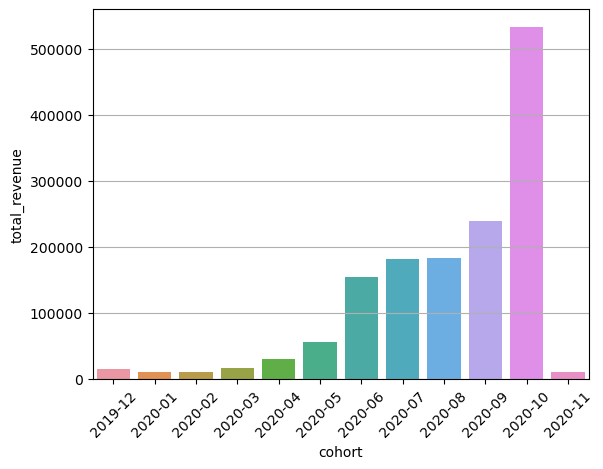

In [481]:
c = revenue_by_cohort(CR_df, fees_df)
display(c)


#Plot the results
barplot = sns.barplot(x="cohort", y="total_revenue", data=c.reset_index())
barplot.grid(axis="y")
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45); #The semicolon (;) hides the output of this last line

In [482]:
#Create a data frame to group the results by cohort on a new csv-file
b = pd.DataFrame(b)

data_by_cohort = pd.merge(pd.merge(a,b,on="cohort",how="outer"),c,on="cohort",how="outer")
data_by_cohort.columns = ["cohort","CR_count","incident_rate","CR_revenue","fee_revenue","total_revenue"]

In [476]:
#Create new data files for Tableau
new_CR_df = CR_df.loc[:,["id","amount","status","created_at","recovery_status","cohort"]]
new_fees_df = fees_df.loc[:,["id","cash_request_id","type","status","total_amount","created_at"]]

new_CR_df.to_csv("NEW extract - cash request.csv")
new_fees_df.to_csv("NEW extract - fees.csv")
data_by_cohort.to_csv("NEW extract - data by cohort.csv")